In [19]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi

STUD_PATH = '/mnt/workspace_stud/'
DATA_PATH = f'{STUD_PATH}mbentse/'
OUTPUT_PATH = f'{STUD_PATH}stud2/output/'

In [20]:
INPUT_PATH = f'{DATA_PATH}catlas_objects/liver_sample_9.h5ad'
TISSUE = INPUT_PATH.split('/')[-1].replace('.h5ad', '')
TSV_OUT = f"{OUTPUT_PATH}wp6/clusters_{TISSUE}.tsv"

In [21]:
adata = ad.read(INPUT_PATH)
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_features(adata, min_cells=1)
#epi.pp.filter_features(adata, min_counts=1)
adata

AnnData object with n_obs × n_vars = 17500 × 1151566
    obs: 'nb_features'
    var: 'n_cells'

In [22]:
np.median(adata.obs['nb_features'])

3081.0

In [23]:
epi.pp.binarize(adata)
adata.layers['binary'] = adata.X.copy()

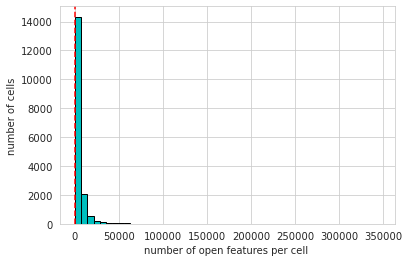

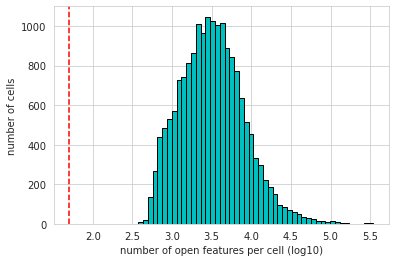

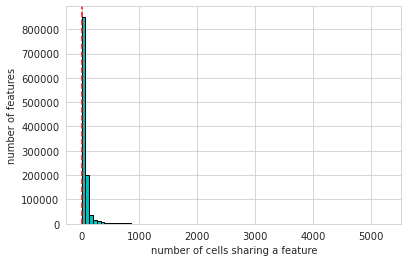

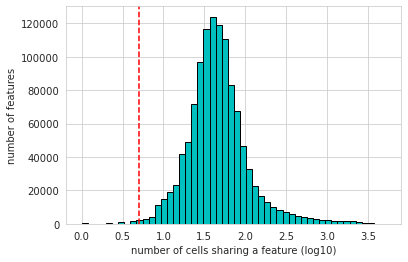

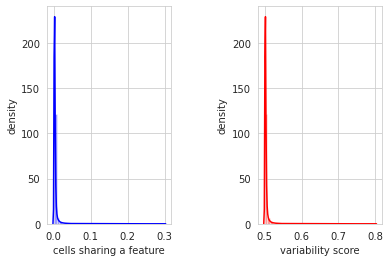

In [24]:
min_features = 50

epi.pp.coverage_cells(adata, binary=True, log=False, bins=50,
               threshold=min_features)
epi.pp.coverage_cells(adata, binary=True, log=10, bins=50,
               threshold=min_features)

min_cells = 5

epi.pp.coverage_features(adata, binary=True, log=False, bins=50,
               threshold=min_cells)
epi.pp.coverage_features(adata, binary=True, log=10, bins=50,
               threshold=min_cells)

epi.pp.cal_var(adata)

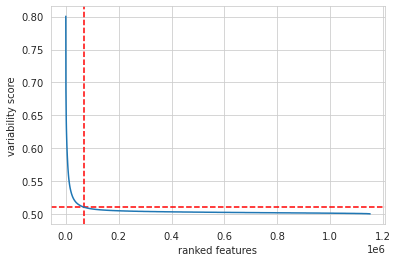

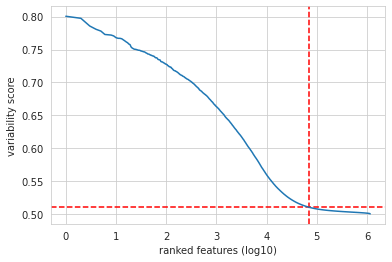

In [25]:
min_score_value = 0.51
nb_feature_selected = 70000
epi.pl.variability_features(adata,log=None,
                     min_score=min_score_value, nb_features=nb_feature_selected)

epi.pl.variability_features(adata,log='log10',
                     min_score=min_score_value, nb_features=nb_feature_selected)

In [26]:
adata.raw = adata

In [9]:
adata = epi.pp.select_var_feature(adata,
                                  nb_features=nb_feature_selected,
                                  show=False,
                                  copy=True)

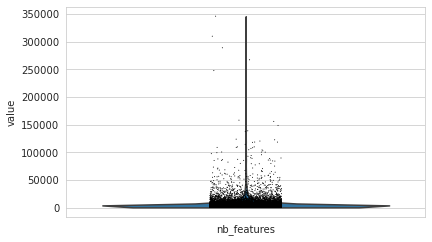

In [10]:
epi.pl.violin(adata, ['nb_features'])

In [11]:
epi.pp.filter_cells(adata, min_features=1)
epi.pp.filter_cells(adata, max_features=10000)

Trying to set attribute `.obs` of view, copying.


In [12]:
epi.pp.filter_features(adata, min_cells=1)
epi.pp.filter_features(adata, max_cells=150)

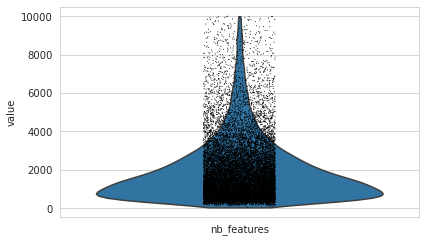

In [13]:
epi.pl.violin(adata, ['nb_features'])

In [14]:
epi.pp.normalize_total(adata)
adata.layers['normalised'] = adata.X.copy()
#epi.pp.log1p(adata)

In [15]:
adata.write_h5ad(f'{OUTPUT_PATH}wp1/{TISSUE}_pp17.h5ad')

In [16]:
adata

AnnData object with n_obs × n_vars = 17070 × 12880
    obs: 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'binary'

In [17]:
len(set(adata.var.index))

12880